In [38]:
import pandas as pd 
import os


data_path = '../data'
file_name_1 = 'Flight Level Data.csv'
file_name_2 = 'PNR+Flight+Level+Data.csv'
file_name_3 = 'PNR Remark Level Data.csv'
file_name_4 = 'Bag+Level+Data.csv'
file_name_5 = 'Airports Data.csv'


full_path_1 = os.path.join(data_path, file_name_1)
full_path_2 = os.path.join(data_path, file_name_2)
full_path_3 = os.path.join(data_path, file_name_3)
full_path_4 = os.path.join(data_path, file_name_4)
full_path_5 = os.path.join(data_path, file_name_5)

flight_df = pd.read_csv(full_path_1)
pnr_flight_df= pd.read_csv(full_path_2)
pnr_remark_df= pd.read_csv(full_path_3)
bag_df= pd.read_csv(full_path_4)
airport_df= pd.read_csv(full_path_5)
print("File loaded successfully!")

File loaded successfully!


In [39]:
flight_df.info()
pnr_flight_df.info()
pnr_remark_df.info()
bag_df.info()
airport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   company_id                          8099 non-null   object
 1   flight_number                       8099 non-null   int64 
 2   scheduled_departure_date_local      8099 non-null   object
 3   scheduled_departure_station_code    8099 non-null   object
 4   scheduled_arrival_station_code      8099 non-null   object
 5   scheduled_departure_datetime_local  8099 non-null   object
 6   scheduled_arrival_datetime_local    8099 non-null   object
 7   actual_departure_datetime_local     8099 non-null   object
 8   actual_arrival_datetime_local       8099 non-null   object
 9   total_seats                         8099 non-null   int64 
 10  fleet_type                          8099 non-null   object
 11  carrier                             8099 non-null   obje

In [40]:
airport_df.isnull().sum()

airport_iata_code     0
iso_country_code     15
dtype: int64

In [41]:
flight_df.isnull().sum()


company_id                            0
flight_number                         0
scheduled_departure_date_local        0
scheduled_departure_station_code      0
scheduled_arrival_station_code        0
scheduled_departure_datetime_local    0
scheduled_arrival_datetime_local      0
actual_departure_datetime_local       0
actual_arrival_datetime_local         0
total_seats                           0
fleet_type                            0
carrier                               0
scheduled_ground_time_minutes         0
actual_ground_time_minutes            0
minimum_turn_minutes                  0
dtype: int64

In [42]:
pnr_flight_df.isnull().sum()


company_id                          0
flight_number                       0
scheduled_departure_date_local      0
scheduled_departure_station_code    0
scheduled_arrival_station_code      0
record_locator                      0
pnr_creation_date                   0
total_pax                           0
is_child                            0
basic_economy_ind                   0
is_stroller_user                    0
lap_child_count                     0
dtype: int64

In [43]:
pnr_remark_df.isnull().sum()


record_locator             0
pnr_creation_date          0
flight_number              0
special_service_request    0
dtype: int64

In [44]:
bag_df.isnull().sum()


company_id                          0
flight_number                       0
scheduled_departure_date_local      0
scheduled_departure_station_code    0
scheduled_arrival_station_code      0
bag_tag_unique_number               0
bag_tag_issue_date                  0
bag_type                            0
dtype: int64

In [45]:
missing_country_codes = airport_df[airport_df['iso_country_code'].isnull()]

print("Airports with missing ISO country codes:")
print(missing_country_codes)


Airports with missing ISO country codes:
     airport_iata_code iso_country_code
321                OND              NaN
322                ERS              NaN
323                WDH              NaN
2628               ADI              NaN
2629               GOG              NaN
2630               GFY              NaN
2631               MPA              NaN
2632               KMP              NaN
2633               LUD              NaN
2634               OKU              NaN
2635               OMD              NaN
2636               NDU              NaN
2637               RHN              NaN
2638               SWP              NaN
2639               WVB              NaN


In [46]:
print("Cleaning data and converting types...")
date_cols_flight = [
    'scheduled_departure_date_local', 'scheduled_departure_datetime_local',
    'scheduled_arrival_datetime_local', 'actual_departure_datetime_local',
    'actual_arrival_datetime_local'
]
for col in date_cols_flight:
    flight_df[col] = pd.to_datetime(flight_df[col])

print("Flight date/time conversion successful!")

Cleaning data and converting types...
Flight date/time conversion successful!


In [47]:
pnr_flight_df['scheduled_departure_date_local'] = pd.to_datetime(pnr_flight_df['scheduled_departure_date_local'])
pnr_flight_df['pnr_creation_date'] = pd.to_datetime(pnr_flight_df['pnr_creation_date'])
pnr_remark_df['pnr_creation_date'] = pd.to_datetime(pnr_remark_df['pnr_creation_date'])
bag_df['scheduled_departure_date_local'] = pd.to_datetime(bag_df['scheduled_departure_date_local'])
bag_df['bag_tag_issue_date'] = pd.to_datetime(bag_df['bag_tag_issue_date'])
print("Date/time conversion complete.")

Date/time conversion complete.


In [48]:
pnr_flight_df['is_child_numeric'] = pnr_flight_df['is_child'].map({'Y': 1, 'N': 0})
pnr_flight_df['is_stroller_user_numeric'] = pnr_flight_df['is_stroller_user'].map({'Y': 1, 'N': 0})

mode_country = airport_df['iso_country_code'].mode()[0]
airport_df['iso_country_code'] = airport_df['iso_country_code'].fillna(mode_country)

print("Data cleaning complete.")
print("-" * 50)

Data cleaning complete.
--------------------------------------------------


In [49]:
flight_key = [
    'flight_number',
    'scheduled_departure_datetime_local', 
    'scheduled_departure_station_code'
]

duplicate_rows = flight_df.duplicated(subset=flight_key).sum()


print(f"Number of duplicate flights found using the key: {duplicate_rows}")

if duplicate_rows == 0:
    print("The key is unique.")
else:
    print("Duplicate rows.")


duplicate_flights = flight_df[flight_df.duplicated(subset=flight_key, keep=False)]


print(duplicate_flights.sort_values(by=flight_key))

Number of duplicate flights found using the key: 23
Duplicate rows.
     company_id  flight_number scheduled_departure_date_local  \
1435         UA            611                     2025-08-10   
2186         UA            611                     2025-08-10   
6910         UA            611                     2025-08-10   
7063         UA            611                     2025-08-10   
5320         UA            881                     2025-08-09   
6363         UA            881                     2025-08-09   
558          UA            881                     2025-08-09   
4297         UA            881                     2025-08-09   
5622         UA            909                     2025-08-09   
7617         UA            909                     2025-08-09   
1640         UA           1270                     2025-08-10   
7673         UA           1270                     2025-08-10   
3844         UA           1270                     2025-08-10   
4273         UA       

In [50]:
flight_key = [
    'flight_number',
    'scheduled_departure_datetime_local', 
    'scheduled_departure_station_code'
]

original_row_count = len(flight_df)

flight_df_cleaned = flight_df.drop_duplicates(subset=flight_key, keep='first')

cleaned_row_count = len(flight_df_cleaned)


remaining_duplicates = flight_df_cleaned.duplicated(subset=flight_key).sum()

print(f"Original row count: {original_row_count}")
print(f"Cleaned row count: {cleaned_row_count}")
print(f"Rows removed: {original_row_count - cleaned_row_count}")
print("-" * 40)
print(f"Remaining duplicates after cleaning: {remaining_duplicates}")

if remaining_duplicates == 0:
    print(" Success! The data is now clean.")

Original row count: 8099
Cleaned row count: 8076
Rows removed: 23
----------------------------------------
Remaining duplicates after cleaning: 0
 Success! The data is now clean.


In [51]:

flight_key = [
    'flight_number',
    'scheduled_departure_datetime_local', 
    'scheduled_departure_station_code'
]

duplicate_rows = flight_df_cleaned.duplicated(subset=flight_key).sum()

print(f"Number of duplicate flights found using the key: {duplicate_rows}")

if duplicate_rows == 0:
    print(" The key is unique")
else:
    print("Duplicate rows found")


duplicate_flights = flight_df_cleaned[flight_df_cleaned.duplicated(subset=flight_key, keep=False)]

print(duplicate_flights.sort_values(by=flight_key))

Number of duplicate flights found using the key: 0
 The key is unique
Empty DataFrame
Columns: [company_id, flight_number, scheduled_departure_date_local, scheduled_departure_station_code, scheduled_arrival_station_code, scheduled_departure_datetime_local, scheduled_arrival_datetime_local, actual_departure_datetime_local, actual_arrival_datetime_local, total_seats, fleet_type, carrier, scheduled_ground_time_minutes, actual_ground_time_minutes, minimum_turn_minutes]
Index: []


In [52]:
flight_key = [
    'flight_number',
    'scheduled_departure_datetime_local',
    'scheduled_departure_station_code'
]

merge_key_date_only = [
    'flight_number',
    'scheduled_departure_date_local',
    'scheduled_departure_station_code'
]


columns_to_merge = [
    'flight_number',
    'scheduled_departure_date_local',
    'scheduled_departure_station_code',
    'scheduled_departure_datetime_local' 
]


pnr_data_with_datetime = pd.merge(
    pnr_flight_df,
    flight_df_cleaned[columns_to_merge],
    on=merge_key_date_only,
    how='left'
)


passenger_agg_df = pnr_data_with_datetime.groupby(flight_key).agg(
    total_passengers=('total_pax', 'sum'),
    child_count=('is_child_numeric', 'sum'),
    stroller_user_count=('is_stroller_user_numeric', 'sum'),
    lap_child_count=('lap_child_count', 'sum'),
    basic_economy_passengers=('basic_economy_ind', 'sum')
).reset_index()

print("Passenger aggregation successful!")
print(passenger_agg_df.head())


print("\nAggregating baggage data...")

bag_data_with_datetime = pd.merge(
    bag_df,
    flight_df_cleaned[columns_to_merge], 
    on=merge_key_date_only,
    how='left'
)


bag_agg_df = bag_data_with_datetime.groupby(flight_key)['bag_type'].value_counts().unstack(fill_value=0).reset_index()


bag_agg_df.columns = [col.lower().replace(' ', '_').replace('(', '').replace(')', '') for col in bag_agg_df.columns]

print("Baggage aggregation successful!")
print(bag_agg_df.head())



link_table_columns = [
    'record_locator',
    'pnr_creation_date',
    'flight_number',
    'scheduled_departure_datetime_local',
    'scheduled_departure_station_code'
]


pnr_link_table = pnr_data_with_datetime[link_table_columns].drop_duplicates()

print("Link table created:")
print(pnr_link_table.head())


merge_on_keys_ssr = ['record_locator', 'pnr_creation_date', 'flight_number']
remarks_with_keys = pd.merge(
    pnr_remark_df,
    pnr_link_table,
    on=merge_on_keys_ssr,
    how='left'
)
print("SSR merge successful!")
print(remarks_with_keys.head())


remarks_with_keys.dropna(subset=flight_key, inplace=True)
ssr_agg_df = remarks_with_keys.groupby(flight_key).size().reset_index(name='ssr_count')


print("SSR aggregation successful!")
print(ssr_agg_df.head())



Passenger aggregation successful!
   flight_number scheduled_departure_datetime_local  \
0              3          2025-08-01 15:55:00+00:00   
1              3          2025-08-02 15:55:00+00:00   
2              3          2025-08-03 15:55:00+00:00   
3              3          2025-08-04 15:55:00+00:00   
4              3          2025-08-05 15:55:00+00:00   

  scheduled_departure_station_code  total_passengers  child_count  \
0                              ORD               177           11   
1                              ORD               183            8   
2                              ORD               199           11   
3                              ORD               199           11   
4                              ORD               180           10   

   stroller_user_count  lap_child_count  basic_economy_passengers  
0                    0                0                         0  
1                    1                0                         0  
2               

In [53]:
final_df = flight_df_cleaned.copy()
flight_key = [
    'flight_number',
    'scheduled_departure_datetime_local',
    'scheduled_departure_station_code'
]


final_df = pd.merge(
    final_df,
    passenger_agg_df,
    on=flight_key,
    how='left'
)


final_df = pd.merge(
    final_df,
    bag_agg_df,
    on=flight_key,
    how='left'
)


final_df = pd.merge(
    final_df,
    ssr_agg_df,
    on=flight_key,
    how='left'
)

final_df.info()


print("\n--- Checking for duplicate rows ---")
duplicate_count = final_df.duplicated(subset=flight_key).sum()
print(f"Found {duplicate_count} duplicate rows based on the flight key.")

if duplicate_count > 0:
    print("Displaying all occurrences of duplicate rows for inspection:")
    duplicates = final_df[final_df.duplicated(subset=flight_key, keep=False)]
    print(duplicates)
    

    final_df.drop_duplicates(subset=flight_key, keep='first', inplace=True)
    print(f"\nRemoved {duplicate_count} duplicate rows. New shape: {final_df.shape}")
print("-" * 50)


count_columns_to_fill = [
    'total_passengers', 'child_count', 'stroller_user_count',
    'lap_child_count', 'basic_economy_passengers',
    'hot_transfer', 'origin', 'transfer', 
    'ssr_count'
]

final_df.isnull().sum()


for col in count_columns_to_fill:
    if col in final_df.columns:
        final_df[col] = final_df[col].fillna(0)


print("Merge complete! Your final analysis-ready dataset is ready.")
print("-" * 50)
print(final_df.info())
print(final_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8076 entries, 0 to 8075
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   company_id                          8076 non-null   object             
 1   flight_number                       8076 non-null   int64              
 2   scheduled_departure_date_local      8076 non-null   datetime64[ns]     
 3   scheduled_departure_station_code    8076 non-null   object             
 4   scheduled_arrival_station_code      8076 non-null   object             
 5   scheduled_departure_datetime_local  8076 non-null   datetime64[ns, UTC]
 6   scheduled_arrival_datetime_local    8076 non-null   datetime64[ns, UTC]
 7   actual_departure_datetime_local     8076 non-null   datetime64[ns, UTC]
 8   actual_arrival_datetime_local       8076 non-null   datetime64[ns, UTC]
 9   total_seats                         8076 

In [54]:
final_df['departure_delay'] = (
    final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60


final_df['passenger_load_factor'] = final_df['total_passengers'] / final_df['total_seats']

final_df['passenger_load_factor'] = final_df['passenger_load_factor'].fillna(0)
final_df.loc[final_df['total_seats'] == 0, 'passenger_load_factor'] = 0


final_df['ground_time_pressure'] = final_df['scheduled_ground_time_minutes'] - final_df['minimum_turn_minutes']


total_bags = final_df['origin'] + final_df['transfer'] + final_df['hot_transfer']
final_df['transfer_bag_ratio'] = final_df['transfer'] / total_bags

final_df['transfer_bag_ratio'] = final_df['transfer_bag_ratio'].fillna(0)

print("New features engineered successfully!")
print(final_df[['departure_delay', 'passenger_load_factor', 'ground_time_pressure', 'transfer_bag_ratio']].head())

New features engineered successfully!
   departure_delay  passenger_load_factor  ground_time_pressure  \
0              7.0               0.855263                     8   
1             22.0               1.023952                    90   
2            111.0               1.084337                    25   
3            105.0               1.100000                   194   
4             -4.0               0.819277                    24   

   transfer_bag_ratio  
0            0.476190  
1            0.258741  
2            0.447059  
3            0.740741  
4            0.728571  


In [55]:
final_df['passenger_load_factor'] = final_df['passenger_load_factor'].clip(upper=1.0)
print("Passenger load factor cleaned.")

Passenger load factor cleaned.


In [56]:
avg_delay = final_df['departure_delay'].mean()
late_flights_percentage = (final_df['departure_delay'] > 0).mean() * 100

print(f"Average departure delay: {avg_delay:.2f} minutes")
print(f"Percentage of flights departing late: {late_flights_percentage:.2f}%")

Average departure delay: 21.19 minutes
Percentage of flights departing late: 49.65%


In [57]:
tight_ground_time_flights = (final_df['ground_time_pressure'] < 0).sum()

print(f"Number of flights with scheduled ground time below minimum: {tight_ground_time_flights}")

Number of flights with scheduled ground time below minimum: 621


In [60]:
temp_df = final_df[final_df['origin'] > 0].copy()
temp_df['transfer_vs_checked_ratio'] = temp_df['transfer'] / temp_df['origin']
avg_transfer_ratio = temp_df['transfer_vs_checked_ratio'].mean()

print(f"Average ratio of transfer bags to checked bags: {avg_transfer_ratio:.2f}")

Average ratio of transfer bags to checked bags: 3.05


Correlation between Passenger Load Factor and Departure Delay: -0.16


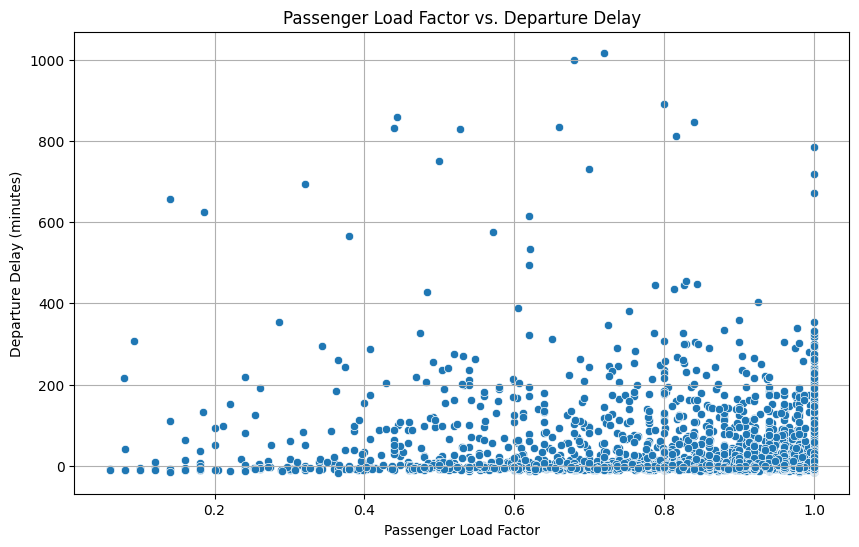

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation = final_df['passenger_load_factor'].corr(final_df['departure_delay'])
print(f"Correlation between Passenger Load Factor and Departure Delay: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='passenger_load_factor', y='departure_delay')
plt.title('Passenger Load Factor vs. Departure Delay')
plt.xlabel('Passenger Load Factor')
plt.ylabel('Departure Delay (minutes)')
plt.grid(True)
plt.show()

--- Answering: Are high SSR flights also high-delay after controlling for load? ---

Average Delay (in mins) by SSR Count, Controlled for Passenger Load:
ssr_category            High SSR    Low SSR
load_category                              
Medium Load (<80%)     53.418301  44.464807
High Load (80-95%)     35.996835  21.840979
Very High Load (>95%)  19.289168  14.827243


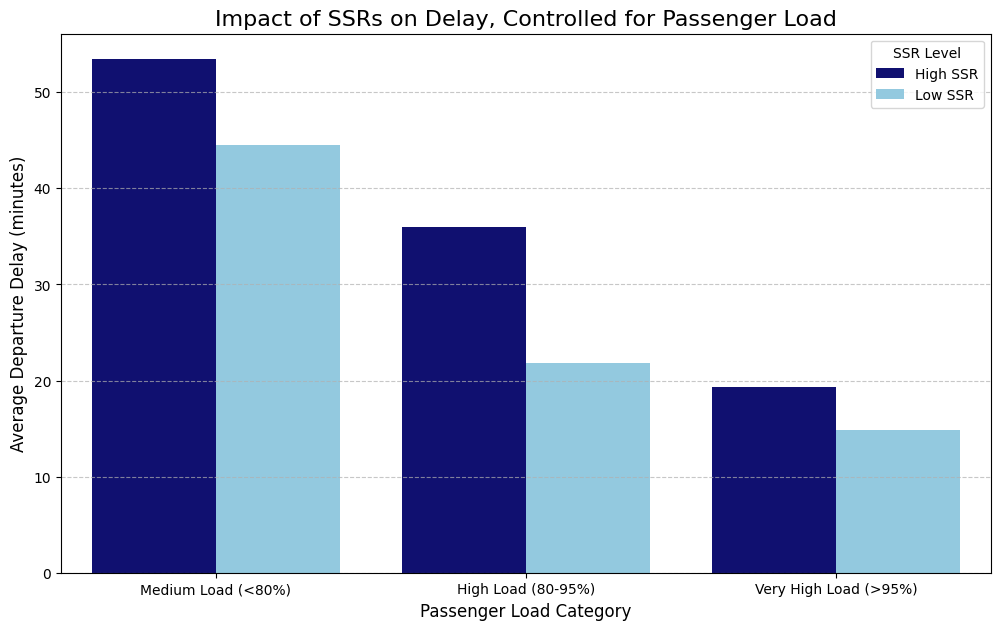

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


print("--- Answering: Are high SSR flights also high-delay after controlling for load? ---")


load_bins = [0, 0.80, 0.95, 1.01] 
load_labels = ['Medium Load (<80%)', 'High Load (80-95%)', 'Very High Load (>95%)']
final_df['load_category'] = pd.cut(final_df['passenger_load_factor'], bins=load_bins, labels=load_labels, right=False)

ssr_median = final_df['ssr_count'].median()
final_df['ssr_category'] = np.where(final_df['ssr_count'] > ssr_median, 'High SSR', 'Low SSR')


controlled_analysis = final_df.groupby(['load_category', 'ssr_category'],observed=True)['departure_delay'].mean().reset_index()

print("\nAverage Delay (in mins) by SSR Count, Controlled for Passenger Load:")

controlled_pivot = controlled_analysis.pivot(index='load_category', columns='ssr_category', values='departure_delay')
print(controlled_pivot)



plt.figure(figsize=(12, 7))
sns.barplot(
    data=controlled_analysis,
    x='load_category',
    y='departure_delay',
    hue='ssr_category',
    palette={'Low SSR': 'skyblue', 'High SSR': 'navy'}
)

plt.title('Impact of SSRs on Delay, Controlled for Passenger Load', fontsize=16)
plt.xlabel('Passenger Load Category', fontsize=12)
plt.ylabel('Average Departure Delay (minutes)', fontsize=12)
plt.legend(title='SSR Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [63]:
from sklearn.preprocessing import MinMaxScaler


features_for_score = [
    'ground_time_pressure',
    'passenger_load_factor',
    'transfer_bag_ratio',
    'ssr_count',
    'hot_transfer', 
    'child_count',
    'lap_child_count'
]


score_features = final_df[features_for_score].copy()


score_features['ground_time_pressure'] = score_features['ground_time_pressure'] * -1

scaler = MinMaxScaler()
score_features_scaled = pd.DataFrame(scaler.fit_transform(score_features), columns=score_features.columns)


weights = {
    'ground_time_pressure': 0.30,
    'passenger_load_factor': 0.15,
    'transfer_bag_ratio': 0.20,
    'ssr_count': 0.15,
    'hot_transfer': 0.10,
    'child_count': 0.05,
    'lap_child_count': 0.05
}

final_df['difficulty_score'] = (
    score_features_scaled['ground_time_pressure'] * weights['ground_time_pressure'] +
    score_features_scaled['passenger_load_factor'] * weights['passenger_load_factor'] +
    score_features_scaled['transfer_bag_ratio'] * weights['transfer_bag_ratio'] +
    score_features_scaled['ssr_count'] * weights['ssr_count'] +
    score_features_scaled['hot_transfer'] * weights['hot_transfer'] +
    score_features_scaled['child_count'] * weights['child_count'] +
    score_features_scaled['lap_child_count'] * weights['lap_child_count']
)


final_df['daily_difficulty_rank'] = final_df.groupby(
    final_df['scheduled_departure_datetime_local'].dt.date
)['difficulty_score'].rank(method='dense', ascending=False)


final_df['difficulty_class'] = pd.qcut(
    final_df['daily_difficulty_rank'],
    q=[0, 0.3, 0.8, 1.0],
    labels=['Difficult', 'Medium', 'Easy']
)


print("\nFlight Difficulty Score, Rank, and Class created successfully!")

print(final_df[[
    'flight_number', 'scheduled_departure_datetime_local', 'difficulty_score',
    'daily_difficulty_rank', 'difficulty_class'
]].sort_values(by='difficulty_score', ascending=False).head(10))


Flight Difficulty Score, Rank, and Class created successfully!
      flight_number scheduled_departure_datetime_local  difficulty_score  \
3315            972          2025-08-11 17:55:00+00:00          0.748030   
4869            972          2025-08-05 17:55:00+00:00          0.734178   
4004            845          2025-08-07 21:20:00+00:00          0.729050   
3035            845          2025-08-04 21:20:00+00:00          0.712098   
6997            845          2025-08-06 21:20:00+00:00          0.709956   
3265            972          2025-08-13 17:55:00+00:00          0.708843   
7250            845          2025-08-11 21:20:00+00:00          0.705082   
1448           1616          2025-08-02 18:32:00+00:00          0.693745   
4636            845          2025-08-08 21:20:00+00:00          0.693643   
6641           2113          2025-08-09 20:08:00+00:00          0.692928   

      daily_difficulty_rank difficulty_class  
3315                    1.0        Difficult  
4869 

In [22]:
difficult_flights = final_df[final_df['difficulty_class'] == 'Difficult']

print("--- Top 10 Most Difficult Destinations ---")
print(difficult_flights['scheduled_arrival_station_code'].value_counts().head(10))

--- Top 10 Most Difficult Destinations ---
scheduled_arrival_station_code
STL    88
DTW    54
GRR    53
DSM    53
MSP    51
DAY    51
CLE    49
CID    49
OMA    48
SEA    45
Name: count, dtype: int64


In [64]:


destination_of_interest = 'STL'


stl_difficult_flights = difficult_flights[difficult_flights['scheduled_arrival_station_code'] == destination_of_interest]

features_to_compare = [
    'departure_delay',
    'ground_time_pressure',
    'transfer_bag_ratio',
    'ssr_count',
    'passenger_load_factor'
]

group_averages = stl_difficult_flights[features_to_compare].mean()

overall_averages = final_df[features_to_compare].mean()


comparison_df = pd.DataFrame({
    f'{destination_of_interest}_Difficult_Avg': group_averages,
    'Overall_Airport_Avg': overall_averages
})


comparison_df['pct_difference'] = (
    (comparison_df[f'{destination_of_interest}_Difficult_Avg'] - comparison_df['Overall_Airport_Avg']) /
     comparison_df['Overall_Airport_Avg']
) * 100


print(f"--- Analysis of Common Drivers for Difficult Flights to {destination_of_interest} ---")
print(comparison_df)


--- Analysis of Common Drivers for Difficult Flights to STL ---
                       STL_Difficult_Avg  Overall_Airport_Avg  pct_difference
departure_delay                23.681818            21.190441       11.757081
ground_time_pressure           80.693182           135.977464      -40.656945
transfer_bag_ratio              0.828204             0.515645       60.615179
ssr_count                       1.727273             2.116890      -18.405156
passenger_load_factor           0.990201             0.934599        5.949296


In [65]:

output_columns = ['flight_number', 'scheduled_departure_datetime_local', 'scheduled_arrival_station_code'] \
                 + features_for_score \
                 + ['difficulty_score', 'daily_difficulty_rank', 'difficulty_class']

final_output_df = final_df[output_columns]
final_output_df.to_csv('test_yourname.csv', index=False)

In [66]:
import pandas as pd



print("---" * 20)
print("POST-ANALYSIS & INSIGHTS")
print("---" * 20)


difficult_flights = final_df[final_df['difficulty_class'] == 'Difficult']
top_difficult_destinations = difficult_flights['scheduled_arrival_station_code'].value_counts().head(10)

print("\n--- Top 10 Most Difficult Destinations ---")
print(top_difficult_destinations)


if not top_difficult_destinations.empty:
    top_destination_code = top_difficult_destinations.index[0]
    

    top_dest_flights = final_df[final_df['scheduled_arrival_station_code'] == top_destination_code]


    top_dest_metrics = top_dest_flights[features_for_score + ['departure_delay']].mean()
    

    airport_wide_metrics = final_df[features_for_score + ['departure_delay']].mean()
    
    comparison_df = pd.DataFrame({
        f'Avg. for {top_destination_code}': top_dest_metrics,
        'Airport-Wide Avg.': airport_wide_metrics
    })
    comparison_df['Difference (%)'] = (comparison_df[f'Avg. for {top_destination_code}'] - comparison_df['Airport-Wide Avg.']) / comparison_df['Airport-Wide Avg.'] * 100

    print(f"\n--- Analysis of Drivers for Top Destination: {top_destination_code} ---")
    print(comparison_df.round(2))
else:
    print("\nNo 'Difficult' flights found to analyze.")



print("\n" + "---" * 20)
print("GENERATING FINAL SUBMISSION CSV")
print("---" * 20)


output_columns = [
    'flight_number', 
    'scheduled_departure_datetime_local', 
    'scheduled_arrival_station_code'
] + features_for_score + [
    'difficulty_score', 
    'daily_difficulty_rank', 
    'difficulty_class'
]


final_output_df = final_df[output_columns]


output_filename = 'test_yourname1.csv'


try:
    final_output_df.to_csv(output_filename, index=False)
    print(f"\n Successfully saved the final output to '{output_filename}'")
    print(f"Total rows in CSV: {len(final_output_df)}")
except Exception as e:
    print(f"\n❌ Error saving file: {e}")


print("\n--- First 5 rows of the output CSV file ---")
print(final_output_df.head())

------------------------------------------------------------
POST-ANALYSIS & INSIGHTS
------------------------------------------------------------

--- Top 10 Most Difficult Destinations ---
scheduled_arrival_station_code
STL    88
DTW    54
GRR    53
DSM    53
MSP    51
DAY    51
CLE    49
CID    49
OMA    48
SEA    45
Name: count, dtype: int64

--- Analysis of Drivers for Top Destination: STL ---
                       Avg. for STL  Airport-Wide Avg.  Difference (%)
ground_time_pressure          66.19             135.98          -51.32
passenger_load_factor          0.98               0.93            5.08
transfer_bag_ratio             0.78               0.52           50.47
ssr_count                      1.49               2.12          -29.75
hot_transfer                   2.91               5.81          -49.83
child_count                    2.88               5.18          -44.38
lap_child_count                0.28               0.69          -59.31
departure_delay               

C:\Users\princ\AppData\Local\Temp\ipykernel_27348\753270390.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_difficult_destinations.values, y=top_difficult_destinations.index, palette='Blues_r')


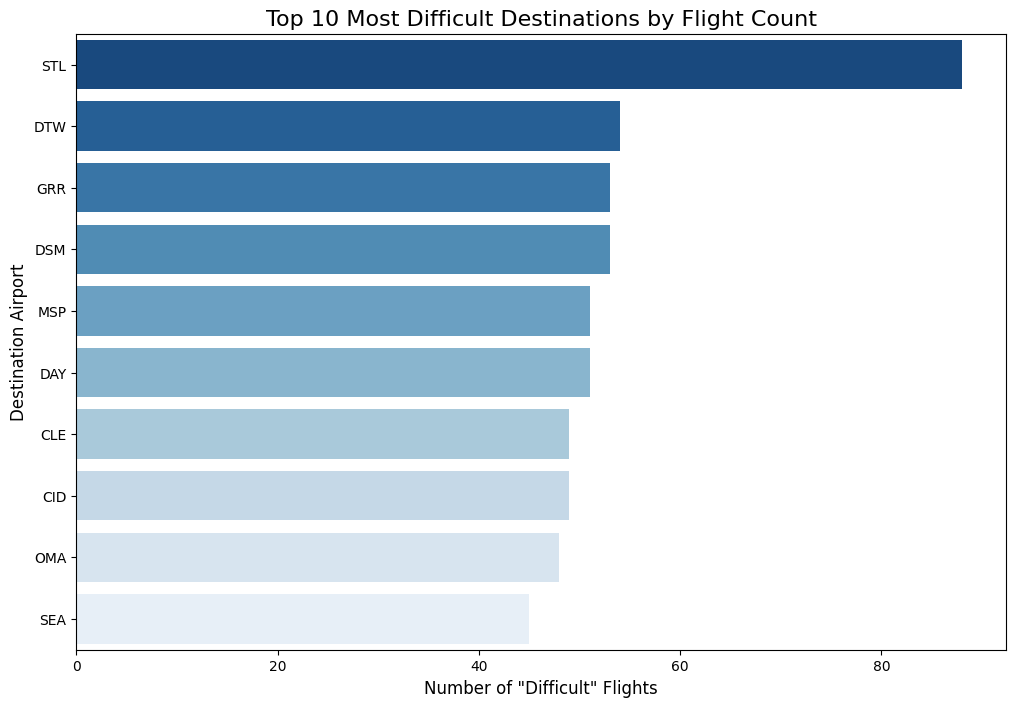

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Chart 3: Horizontal Bar Chart ---
difficult_flights = final_df[final_df['difficulty_class'] == 'Difficult']
top_difficult_destinations = difficult_flights['scheduled_arrival_station_code'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_difficult_destinations.values, y=top_difficult_destinations.index, palette='Blues_r')
plt.title('Top 10 Most Difficult Destinations by Flight Count', fontsize=16)
plt.xlabel('Number of "Difficult" Flights', fontsize=12)
plt.ylabel('Destination Airport', fontsize=12)


plt.savefig('top_difficult_destinations_bar.png', dpi=300, bbox_inches='tight')

plt.show()

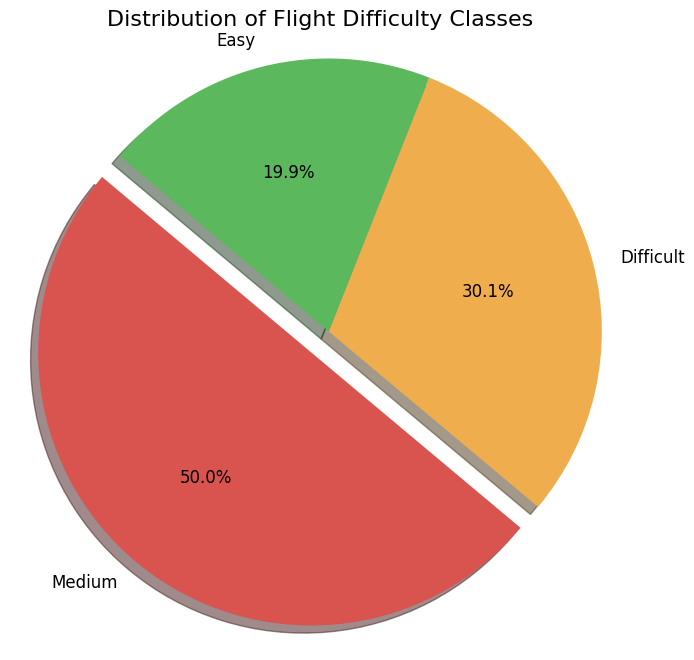

In [ ]:
import matplotlib.pyplot as plt

# --- Pie Chart 1: Flight Difficulty Distribution ---


difficulty_counts = final_df['difficulty_class'].value_counts()


colors = ['#d9534f', '#f0ad4e', '#5cb85c'] 
explode = (0.1, 0, 0)  


plt.figure(figsize=(8, 8))
plt.pie(difficulty_counts, 
        explode=explode, 
        labels=difficulty_counts.index, 
        colors=colors,
        autopct='%1.1f%%',  
        shadow=True, 
        startangle=140,
        textprops={'fontsize': 12})

plt.title('Distribution of Flight Difficulty Classes', fontsize=16)
plt.axis('equal')  

plt.savefig('difficulty_distribution_pie.png', dpi=300, bbox_inches='tight')

plt.show()

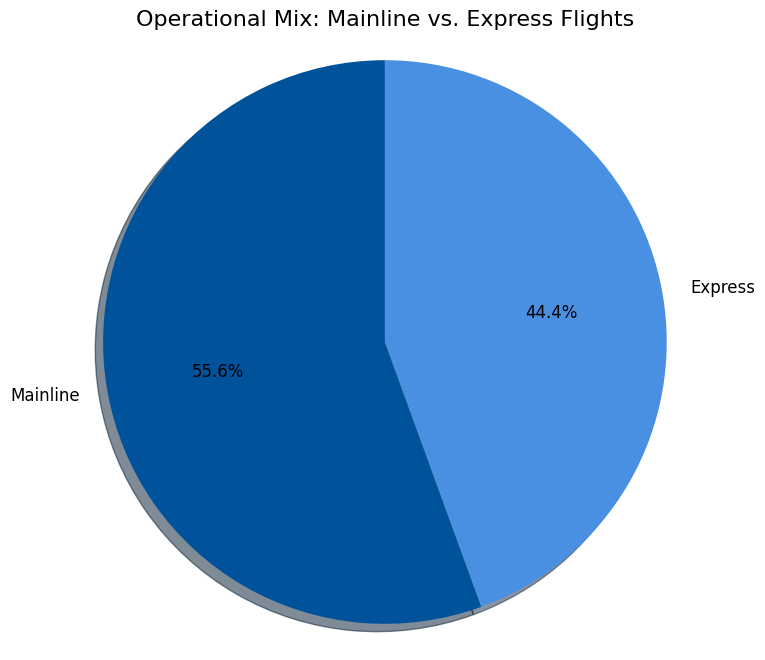

In [ ]:
import matplotlib.pyplot as plt




carrier_counts = final_df['carrier'].value_counts()


colors = ['#00529b', '#4A90E2'] 


plt.figure(figsize=(8, 8))
plt.pie(carrier_counts, 
        labels=carrier_counts.index, 
        colors=colors,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 12})

plt.title('Operational Mix: Mainline vs. Express Flights', fontsize=16)
plt.axis('equal')


plt.savefig('carrier_mix_pie.png', dpi=300, bbox_inches='tight')

plt.show()

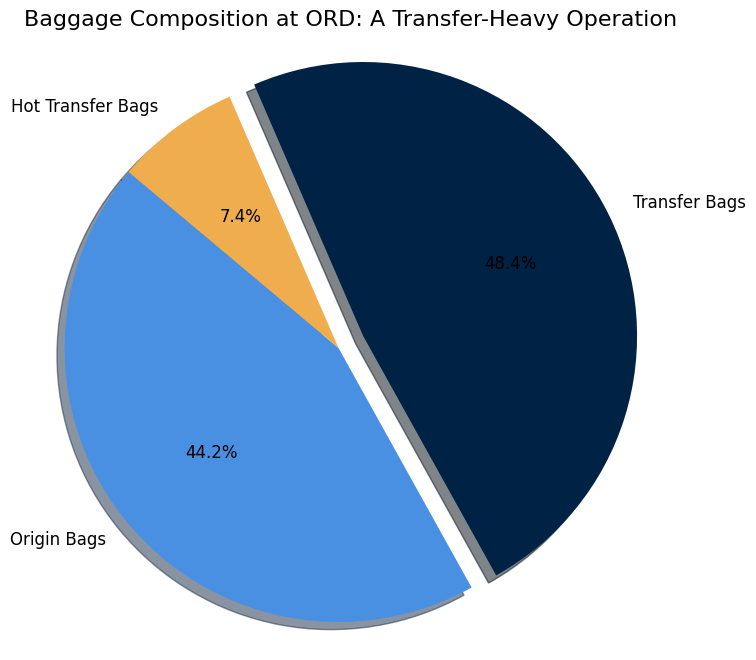

In [ ]:
import matplotlib.pyplot as plt


bag_composition = {
    'Origin Bags': final_df['origin'].sum(),
    'Transfer Bags': final_df['transfer'].sum(),
    'Hot Transfer Bags': final_df['hot_transfer'].sum()
}
labels = list(bag_composition.keys())
sizes = list(bag_composition.values())

colors = ['#4A90E2', '#002244', '#f0ad4e'] # Blues for regular bags, orange for urgent
explode = (0, 0.1, 0) # Explode the 2nd slice (Transfer Bags)

plt.figure(figsize=(8, 8))
plt.pie(sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140,
        textprops={'fontsize': 12})

plt.title('Baggage Composition at ORD: A Transfer-Heavy Operation', fontsize=16)
plt.axis('equal')

plt.savefig('baggage_composition_pie.png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\princ\AppData\Local\Temp\ipykernel_27348\3701793230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_difficult_destinations.values, y=top_difficult_destinations.index, palette='Blues_r')


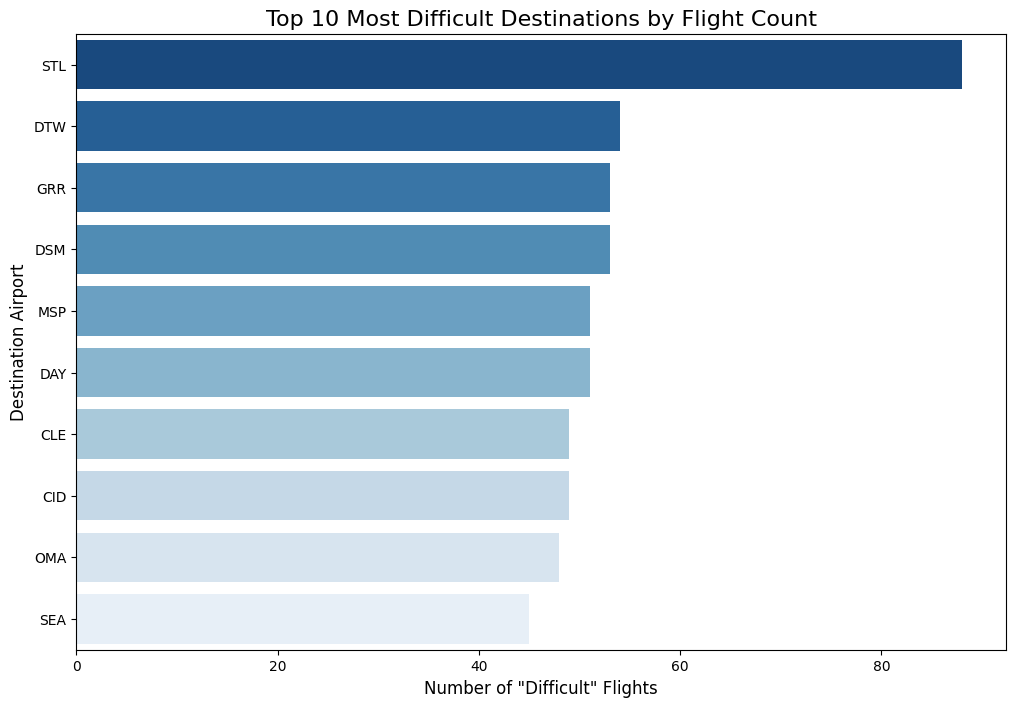

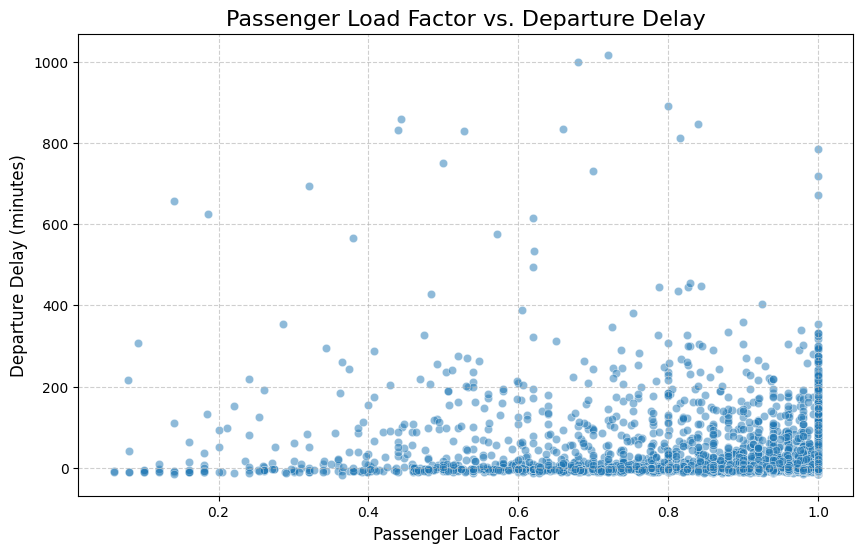

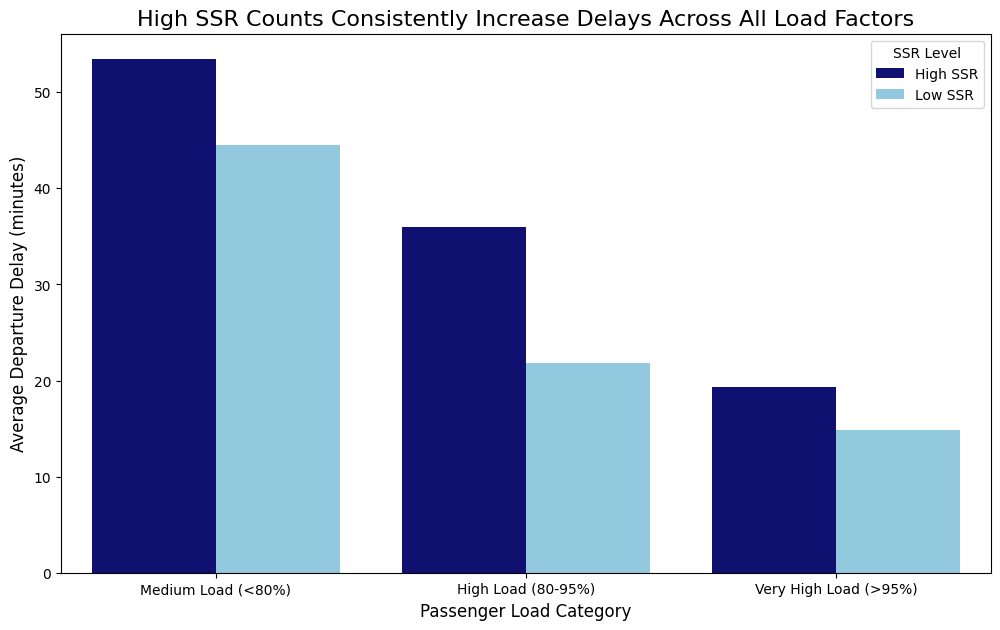

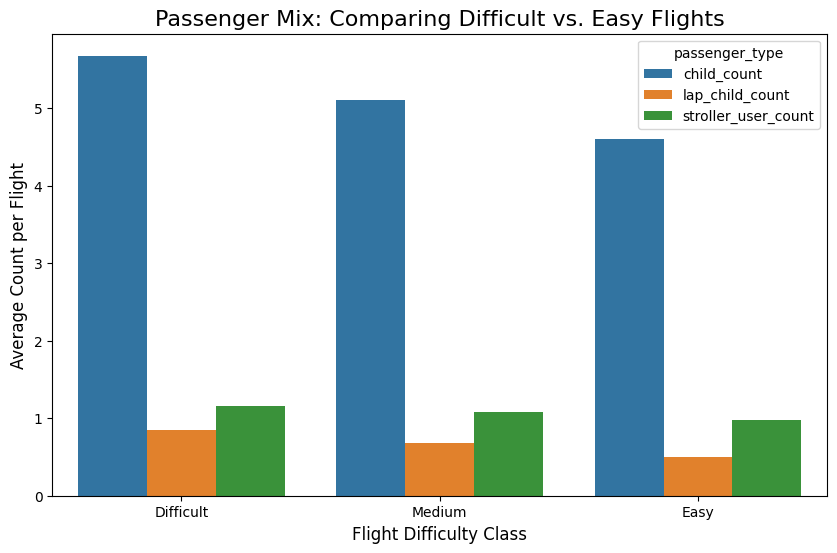

C:\Users\princ\AppData\Local\Temp\ipykernel_27348\3701793230.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ssrs.values, y=top_ssrs.index, palette='viridis')


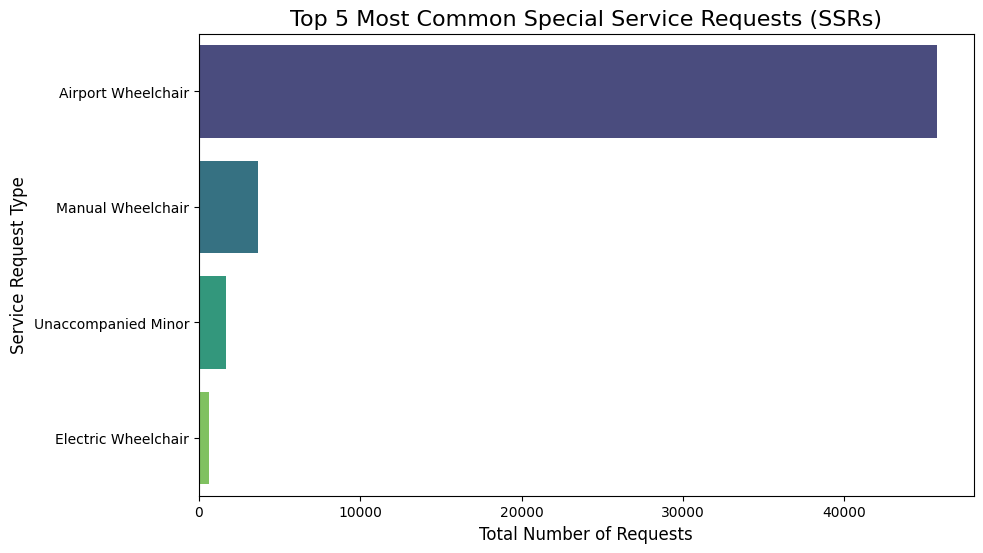

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Chart 1: Top Difficult Destinations (Horizontal Bar Chart) ---
difficult_flights = final_df[final_df['difficulty_class'] == 'Difficult']
top_difficult_destinations = difficult_flights['scheduled_arrival_station_code'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_difficult_destinations.values, y=top_difficult_destinations.index, palette='Blues_r')
plt.title('Top 10 Most Difficult Destinations by Flight Count', fontsize=16)
plt.xlabel('Number of "Difficult" Flights', fontsize=12)
plt.ylabel('Destination Airport', fontsize=12)
plt.savefig('top_difficult_destinations_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Chart 2: Passenger Load vs. Delay (Scatter Plot) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='passenger_load_factor', y='departure_delay', alpha=0.5)
plt.title('Passenger Load Factor vs. Departure Delay', fontsize=16)
plt.xlabel('Passenger Load Factor', fontsize=12)
plt.ylabel('Departure Delay (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('load_vs_delay_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Chart 3: SSR Impact on Delay (Grouped Bar Chart) ---
load_bins = [0, 0.80, 0.95, 1.01] 
load_labels = ['Medium Load (<80%)', 'High Load (80-95%)', 'Very High Load (>95%)']
final_df['load_category'] = pd.cut(final_df['passenger_load_factor'], bins=load_bins, labels=load_labels, right=False)
ssr_median = final_df['ssr_count'].median()
final_df['ssr_category'] = np.where(final_df['ssr_count'] > ssr_median, 'High SSR', 'Low SSR')
controlled_analysis = final_df.groupby(['load_category', 'ssr_category'], observed=True)['departure_delay'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(
    data=controlled_analysis,
    x='load_category',
    y='departure_delay',
    hue='ssr_category',
    palette={'Low SSR': 'skyblue', 'High SSR': 'navy'}
)
plt.title('High SSR Counts Consistently Increase Delays Across All Load Factors', fontsize=16)
plt.xlabel('Passenger Load Category', fontsize=12)
plt.ylabel('Average Departure Delay (minutes)', fontsize=12)
plt.legend(title='SSR Level')
plt.savefig('ssr_impact_on_delay_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Chart 4: Passenger Mix Comparison (For Appendix) ---
passenger_mix_analysis = final_df.groupby('difficulty_class', observed=True)[['child_count', 'lap_child_count', 'stroller_user_count']].mean().reset_index()
passenger_mix_melted = passenger_mix_analysis.melt(id_vars='difficulty_class', var_name='passenger_type', value_name='average_count')
plt.figure(figsize=(10, 6))
sns.barplot(data=passenger_mix_melted, x='difficulty_class', y='average_count', hue='passenger_type')
plt.title('Passenger Mix: Comparing Difficult vs. Easy Flights', fontsize=16)
plt.xlabel('Flight Difficulty Class', fontsize=12)
plt.ylabel('Average Count per Flight', fontsize=12)
plt.savefig('passenger_mix_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Chart 5: Top SSRs (For Appendix) ---
top_ssrs = pnr_remark_df['special_service_request'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ssrs.values, y=top_ssrs.index, palette='viridis')
plt.title('Top 5 Most Common Special Service Requests (SSRs)', fontsize=16)
plt.xlabel('Total Number of Requests', fontsize=12)
plt.ylabel('Service Request Type', fontsize=12)
plt.savefig('top_ssrs_bar.png', dpi=300, bbox_inches='tight')
plt.show()